In [1]:
import cv2
import numpy as np
import numpy.linalg as npl
from matplotlib import pyplot as plt
from matplotlib import cbook

## Experimenting with recreating the image using albedo and shading

In [2]:
# Just to avoid more typing than necessary
def imshow(input):
    plt.axis('off')
    plt.imshow(input)

In [3]:
img = plt.imread('./church/input.png')
normals = plt.imread('./church/normals.png')
albedo = plt.imread('./church/ours_alb.png')
shading = plt.imread('./church/ours_shd.png')
shading = np.dstack((shading, shading, shading)) 
# ^ shading now has 3 channels despite being grayscale
# otherwise numpy will complain shapes of albedo and shading do not match

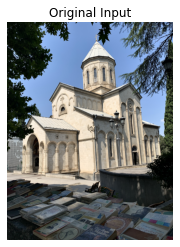

In [4]:
plt.axis('off')
plt.title("Original Input")
plt.imshow(img)

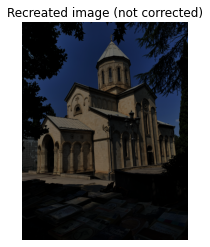

In [5]:
# This is how the image looks like if we don't correct albedo and shading

linear_recreated_img = albedo * shading
plt.title("Recreated image (not corrected)")
imshow(linear_recreated_img)

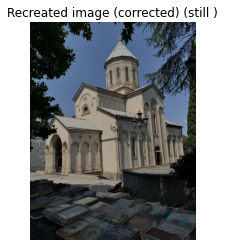

In [6]:
albedo_corrected = albedo ** 0.4545
shading_corrected = shading ** 0.4545
recreated_img = albedo_corrected * shading_corrected

plt.title("Recreated image (corrected) (still )")
imshow(recreated_img)

## Now actual relighting... Create new shading somehow?? (tbd)

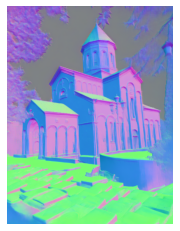

In [7]:
# So this is what our normals look like
imshow(normals)

In [8]:
print(normals)

[[[0.5254902  0.5372549  0.7647059 ]
  [0.54509807 0.47058824 0.7411765 ]
  [0.5647059  0.43529412 0.73333335]
  ...
  [0.35686275 0.44313726 0.7490196 ]
  [0.36078432 0.43529412 0.75686276]
  [0.4117647  0.40784314 0.72156864]]

 [[0.60784316 0.41960785 0.7607843 ]
  [0.5568628  0.42352942 0.7529412 ]
  [0.57254905 0.40392157 0.7411765 ]
  ...
  [0.32941177 0.45490196 0.74509805]
  [0.3254902  0.45882353 0.77254903]
  [0.3529412  0.4392157  0.7529412 ]]

 [[0.6117647  0.3764706  0.7647059 ]
  [0.5686275  0.40392157 0.7529412 ]
  [0.5803922  0.38431373 0.7490196 ]
  ...
  [0.33333334 0.44313726 0.74509805]
  [0.3254902  0.44313726 0.75686276]
  [0.34509805 0.42745098 0.7647059 ]]

 ...

 [[0.24313726 0.627451   0.85882354]
  [0.20784314 0.6431373  0.8627451 ]
  [0.20392157 0.62352943 0.8666667 ]
  ...
  [0.4627451  0.99215686 0.47058824]
  [0.45490196 0.99215686 0.4745098 ]
  [0.4627451  0.99607843 0.47843137]]

 [[0.24705882 0.64705884 0.85490197]
  [0.21176471 0.6666667  0.8745098 ]


(1216, 928, 3)


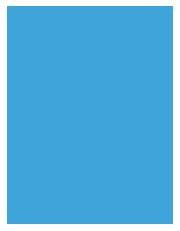

In [9]:
# So this is our light direction... Using the same format as the normals
# which is to say im not sure what this direction even is
light_dir = np.zeros([1216, 928, 3])
light_dir[:] = (0.24705882, 0.64705884, 0.85490197)
imshow(light_dir)
print(np.shape(light_dir))

## Nothing works past here
My general idea is that if Image = Albedo * Shading, and we have our Albedo
then we just need to get the new Shading based on our new light direction and we are all set! (kind of)

Right now I'm testing a theory of, what if shading = normals * new light direction? (or maybe it's their dot product??) I am testing it by trying to understand normals a bit more cuz I'm out of my depth here now

In [10]:
# Figure out a light direction map based on the normals
# TODO: dot product -.-
normals_and_light_dir = np.dot(normals, light_dir)

imshow(normals_and_light_dir)

ValueError: shapes (1216,928,3) and (1216,928,3) not aligned: 3 (dim 2) != 928 (dim 1)

In [11]:
light_color = (1, 1, 1)
light_power = 1
colored = albedo * light_color * light_power * normals_and_light_dir

imshow(colored)

NameError: name 'normals_and_light_dir' is not defined